Copyright (C) 2016 The HDF Group  
All rights reserved

This example code illustrates how to access and visualize a GES DISC MLS 
v4 [1] Swath HDF-EOS5 file in Python.

If you have any questions, suggestions, or comments on this example, please use
the HDF-EOS Forum (http://hdfeos.org/forums).  If you would like to see an
example of any other NASA HDF/HDF-EOS data product that is not listed in the
HDF-EOS Comprehensive Examples page (http://hdfeos.org/zoo), feel free to
contact us at eoshelp@hdfgroup.org or post it at the HDF-EOS Forum
(http://hdfeos.org/forums).

# Access MLS data from GES DISC via OPeNDAP

 The first step is to make sure that your NASA Earthdata Login username and password works with OPeNDAP server.

In [9]:
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

from pydap.client import open_url, open_dods
from pydap.cas.urs import setup_session
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# Replace username and passowrd to match yours.
session = setup_session('hyoklee', '12Lance$')

# Make sure you use https.
FILE_NAME = 'MLS-Aura_L2GP-BrO_v04-23-c03_2016d302.he5'
url = 'https://acdisc.gesdisc.eosdis.nasa.gov/opendap/HDF-EOS5/Aura_MLS_Level2/ML2BRO.004/2016/'+FILE_NAME
dataset = open_url(url, session=session)

# This should print all datasets available from the OPeNDAP url.
print dataset


<DatasetType with children 'BrO_AscDescMode', 'BrO_Convergence', 'BrO_L2gpPrecision', 'BrO_L2gpValue', 'BrO_Quality', 'BrO_Status', 'BrO_ChunkNumber', 'BrO_LineOfSightAngle', 'BrO_LocalSolarTime', 'BrO_Longitude', 'BrO_OrbitGeodeticAngle', 'BrO_SolarZenithAngle', 'BrO_Time', 'BrO_APriori_AscDescMode', 'BrO_APriori_Convergence', 'BrO_APriori_L2gpPrecision', 'BrO_APriori_L2gpValue', 'BrO_APriori_Quality', 'BrO_APriori_Status', 'BrO_APriori_ChunkNumber', 'BrO_APriori_LineOfSightAngle', 'BrO_APriori_LocalSolarTime', 'BrO_APriori_Longitude', 'BrO_APriori_OrbitGeodeticAngle', 'BrO_APriori_SolarZenithAngle', 'BrO_APriori_Time', 'StructMetadata_0', 'coremetadata_0', 'xmlmetadata', 'BrO_Latitude', 'BrO_Pressure', 'BrO_APriori_Latitude', 'BrO_APriori_Pressure'>


Second, let's make sure that all data and attributes are read correctly.

In [10]:
data = dataset['BrO_L2gpValue'][399,:].squeeze()
print data
print dataset['BrO_L2gpValue'].attributes
title = dataset['BrO_L2gpValue'].attributes['title']
units = dataset['BrO_L2gpValue'].attributes['units']

pressure =  dataset['BrO_Pressure'][:]
print pressure
pres_units = dataset['BrO_Pressure'].attributes['units']
time = dataset['BrO_Time'][:]

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -3.74916515e-10  -3.14158005e-10  -1.73345394e-10
   1.55571153e-10   1.19209809e-10  -1.27896735e-10  -2.47035892e-10
  -1.63307562e-10  -5.70108925e-11   1.74226189e-11  -5.41054632e-11
  -1.19155824e-10  -7.88699522e-11  -1.10642502e-11   4.69474598e-11
   8.74631964e-11   9.33837938e-11   1.35088815e-10   1.95402472e-10
   2.10984286e-10   1.91220997e-10   1.41762629e-10   8.85877482e-11
   4.28642087e-11   6.42613740e-12  -2.50976497e-11   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00]
{u'_FillValue': -999.9899902, u'fullnamepath': '/HDFEOS/SWATHS/BrO/Data Fields/L2gpValue', u'UniqueFieldDefinition': 'MLS-Specific', u'origname': 'L2gpValue', u'title': 'BrO', u'orig_dimname_list': 'nTimes nLevels', u'units': 'vmr', u'missing_value': -999.9899902}
[  1.00000000e+03   6.81292053e+02   4.64158875e+02   3.16227753e+02
   2.15443466e+02   1.4677

Finally, let's plot data in line graph. Read MLS Data Quality Document [2] for useful range in BrO data, which is 3.2hPa - 10hPa. We will subset data for the range.

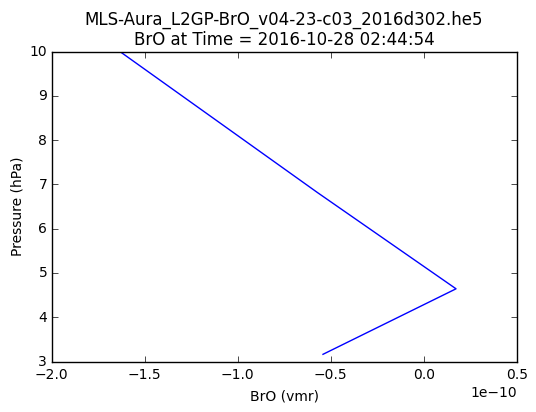

In [11]:
plt.plot(data[12:16], pressure[12:16])
plt.ylabel('Pressure ({0})'.format(pres_units))
plt.xlabel('{0} ({1})'.format(title, units))
    
basename = os.path.basename(FILE_NAME)
timebase = datetime.datetime(1993, 1, 1, 0, 0, 0) + datetime.timedelta(seconds=time[399])
timedatum = timebase.strftime('%Y-%m-%d %H:%M:%S')
plt.title('{0}\n{1} at Time = {2}'.format(basename, title, timedatum))
fig = plt.gcf()


You can save the above plot in PNG file.

In [12]:
pngfile = "{0}.py.png".format(basename)
fig.savefig(pngfile)

# References

1. https://cmr.earthdata.nasa.gov/search/concepts/C1251101115-GES_DISC/3
2. http://mls.jpl.nasa.gov/data/v4-2_data_quality_document.pdf

 